In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [185]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [186]:
df.info() #looking if there are any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


No null values exist in our above dataset. 

### Hypothesis formulation and testing 

Null hypothesis (H0), and Alternate Hypothesis (H1)

>Type I error - Rejection of a true hypothesis, also called false positive.                                                       

>Type II error - Non rejection of a false hypothesis, also called false negative.

Significance Level:
The signiﬁcance level selected for a test should reﬂect the consequences associated with Type 1 and Type 2 Errors.
The standard significance level is 0.05 or 5%

When the p value associated with the test statistic is less than 0.05, then we reject the null hypothesis.

###### Different types of test
 •Chi square test - Used to determine if two categorical variables have any correlation between them. Useful in feature selection.

 •T test - A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups, which may be related in certain features.

 •Pearson correlation coefficient - Direction and strength of the relationship between two variables

 •Point biserial correlation - It is used to measure the relationship between a binary variable, x, and a continuous variable, y. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply a determinative relationship.

##### Hypothesis 1: 

>H0 - The mean of the math, reading and writing scores are not different (the null hypothesis is always a stament of no difference)

>H1 - The mean of the math, reading and writing scores are all different (the alternate hypothesis always contradicts the null hypothesis)
    
The 1- way ANOVA (Analysis of variance) test is used in cases where we need to compare the means of more than 2 groups.  


c:\users\vishruth\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\vishruth\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\vishruth\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

<AxesSubplot:xlabel='writing score', ylabel='Density'>

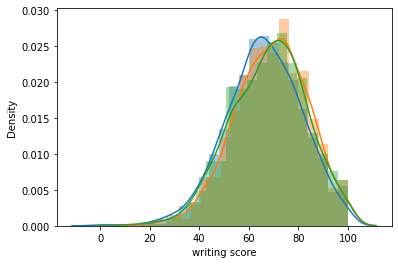

In [187]:
sns.distplot(df['math score'], hist = True)
sns.distplot(df['reading score'], hist = True)
sns.distplot(df['writing score'], hist = True)


The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

In [188]:
import scipy.stats as sp
sp.f_oneway(df['math score'], df['reading score'], df['writing score'])

F_onewayResult(statistic=10.824191628378626, pvalue=2.0701893192229333e-05)

In [189]:
df_between = 2
df_within = 3000 - 3
sp.f.ppf(0.95, df_between, df_within)

2.998728735099001

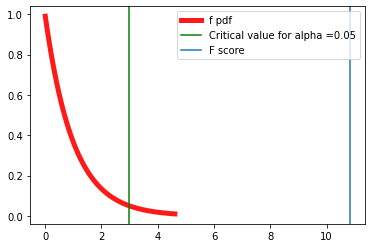

In [190]:
import matplotlib.pyplot as plt
from scipy.stats import f 
fig, ax = plt.subplots(1,1) 
dfn, dfd = 2, 2997 #df_between, df_within
x = np.linspace(f.ppf(0.01, dfn, dfd), f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd), 'r-', lw=5, alpha=0.9, label = "f pdf")
plt.axvline(x=f.ppf(0.95, df_between, df_within), label='Critical value for alpha =0.05', color='g')
#plt.axvline(x=2.9987, label='Critical value for alpha =0.1', color='g' )
plt.axvline(x=10.82, label='F score' )
plt.legend();



Seeing as the test statisitc value of 10.82 is beyond the critical value of 2.99 and also the p value is below the agreed upon significance value of 0.05, we can reject the null hypothesis and therefore accept the alternate hypothesis H1.

The mean of the three score i.e math, reading and writing are all different. 

##### Hypothesis 2

>H0 - There is no relation between the gender of a student and their academic performance. 

>H1 - There is a relation between the gender of a student and their academic performance. 

Chi-squared test for independence is used.
The chi square test is used when we have two categoraical variables and we want to check if there is an association between the two variables. 

In our case below, the overall performance is not a categorical variable, but instead a continuos variable. We can convert this into categories based on a threshold. 
Let us consider score above 50 as goodm adn less than 50 as bad.


In [191]:
df['overall_performance'] = (df['math score'] + df['reading score'] + df['writing score'])/3
df_copy = df.copy()
grade = []
overall_performance = df['overall_performance']
for i in overall_performance :
    if i > 40 :
        grade.append('good')
    else :
        grade.append('bad')
df_copy['grade'] = grade
df_copy.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_performance,grade
14,female,group A,master's degree,standard,none,50,53,58,53.666667,good
481,female,group D,associate's degree,free/reduced,none,52,59,56,55.666667,good
136,male,group B,some high school,standard,completed,51,54,41,48.666667,good
963,female,group C,some high school,free/reduced,completed,65,76,75,72.000000,good
252,female,group B,some high school,standard,completed,60,70,70,66.666667,good
316,female,group D,master's degree,standard,completed,77,82,91,83.333333,good
589,female,group A,some high school,standard,none,48,66,65,59.666667,good
570,male,group B,some college,standard,completed,71,75,70,72.000000,good
156,female,group E,high school,free/reduced,completed,66,74,78,72.666667,good
128,male,group D,master's degree,standard,none,82,82,74,79.333333,good


In [192]:
chi_table = pd.crosstab(df_copy['gender'], df_copy['grade'])
chi_table

grade,bad,good
gender,,
female,17,501
male,15,467


In [193]:
observed_values = chi_table.values
observed_values

array([[ 17, 501],
       [ 15, 467]], dtype=int64)

In [194]:
val = sp.chi2_contingency(chi_table)
val

(0.0007468356676203008,
 0.9781978897295346,
 1,
 array([[ 16.576, 501.424],
        [ 15.424, 466.576]]))

In [195]:
expected_val = val[3] 
expected_val

array([[ 16.576, 501.424],
       [ 15.424, 466.576]])

In [196]:
chi_square = sum([(o-e)**2./e for o,e in zip(observed_values, expected_val)])
chi_square_statistic = chi_square[0] + chi_square[1]
print('Chi-square statistic is:', chi_square_statistic)

Chi-square statistic is: 0.023245001555073096


In [197]:
from scipy.stats import chi2
chi_square_critical = chi2.ppf(0.9, 1)
chi_square_critical

2.705543454095404

In [198]:
p_value = 1 - chi2.cdf(x = chi_square_statistic, df = 1)
print(p_value)

0.8788216799482794


In [199]:
if chi_square_statistic >= chi_square_critical:
    print("Reject H0, there is a relationship between the two")
else:
    print("Reject H1, there is no relationship between the two")
if p_value <= 0.05: 
    print("Reject H0, there is a relationship between the two")
else:
    print("Reject H1, there is no relationship between the two")


Reject H1, there is no relationship between the two
Reject H1, there is no relationship between the two


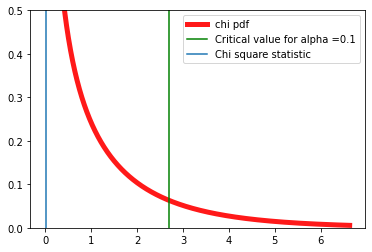

In [200]:
fig1, ax1 = plt.subplots(1,1) 
#dfn, dfd = 2, 2997 #df_between, df_within
ddof = 1
x1 = np.linspace(chi2.ppf(0.01, ddof), chi2.ppf(0.99,ddof), 1000)
ax1.plot(x1, chi2.pdf(x1, ddof), 'r-', lw=5, alpha=0.9, label = "chi pdf")
plt.axvline(x=chi2.ppf(0.9, ddof), label='Critical value for alpha =0.1', color='g')
#plt.axvline(x=2.9987, label='Critical value for alpha =0.1', color='g' )
plt.axvline(x=0.023, label='Chi square statistic' )
plt.ylim(0, 0.5)
plt.legend();

##### Hypothesis 3
An educational consultant claims that students get an avergae score of 80 or more.

> H0: Students get a score of 70 or more.

> H1: students get less than 70

Test: One sample T-Test
It is used when we want to compare population mean, with some value. 

In [201]:
statistics = sp.ttest_1samp(df_copy['overall_performance'], 70)
print(statistics)

Ttest_1sampResult(statistic=-4.944665643928837, pvalue=8.942878479352004e-07)


In [202]:
if statistics[1] <= 0.05: 
    print("Reject H0, the consultants claim is wrong")
else:
    print("Reject H1, the consultants claim is right")


Reject H0, the consultants claim is wrong


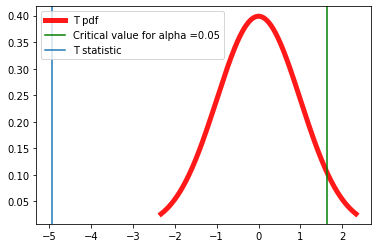

In [203]:
fig2, ax2 = plt.subplots(1,1) 
#dfn, dfd = 2, 2997 #df_between, df_within
df = 999
x2 = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 1000)
ax2.plot(x2, t.pdf(x2, df), 'r-', lw=5, alpha=0.9, label = "T pdf")
plt.axvline(x=t.ppf(0.95, df), label='Critical value for alpha =0.05', color='g')
#plt.axvline(x=2.9987, label='Critical value for alpha =0.1', color='g' )
plt.axvline(x=-4.94466, label='T statistic' )
plt.legend()
plt.plot();


##### Hypothesis 4
The test preparation has no effect on the overall score

>H0:There is no significant difference in the mean score of students who have taken test preparation and those students who have not taken any test preparation

>H1: There is a difference

We will perform a two sample test. 

##### Levene’s Test

One of the assumptions for two-sample t-test is that the sample observations have homogeneity of variance. The variances of the populations from which different samples are drawn are equal.
Student’s t-test is no longer robust when the data sets have unequal variances especially when they also have unequal sample sizes.

Null Hypothesis for Levene’s test: The two samples come from populations having equal variance.

Alternate Hypothesis for Levene’s test: The two samples come from populations having different variance.

In [204]:
df_copy.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_performance,grade
811,male,group A,high school,free/reduced,none,45,47,49,47.000000,good
145,female,group C,some college,free/reduced,none,22,39,33,31.333333,bad
672,female,group C,some college,standard,none,69,78,76,74.333333,good
506,male,group A,high school,standard,none,68,70,66,68.000000,good
555,female,group C,some college,free/reduced,none,32,39,33,34.666667,bad


In [208]:
sp.levene(df_copy['overall_performance'][df_copy['test preparation course'] == 'completed'], df_copy['overall_performance'][df_copy['test preparation course'] == 'none'], center = 'mean')

LeveneResult(statistic=2.8142352258996643, pvalue=0.09374453284949794)

Here the p-value is greater than alpha (0.05), therefore we can not reject the null hypothesis. 
Hence,the two samples come from populations having equal variance, and this necessary condition to perform the two sample t test is fulfilled.

In [209]:
sp.ttest_ind(df_copy['overall_performance'][df_copy['test preparation course'] == 'completed'], df_copy['overall_performance'][df_copy['test preparation course'] == 'none'])

Ttest_indResult(statistic=8.390944443482592, pvalue=1.633780203592351e-16)

In [212]:
df_copy['overall_performance'][df_copy['test preparation course'] == 'completed'].count()

358

In [213]:
df_copy['overall_performance'][df_copy['test preparation course'] == 'none'].count()

642

In [214]:
dof = 357 #smaller sample - 1

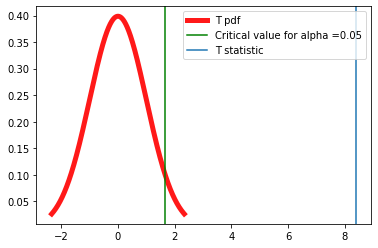

In [215]:
fig3, ax3 = plt.subplots(1,1) 
#dfn, dfd = 2, 2997 #df_between, df_within
df = 357
x3 = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 1000)
ax3.plot(x3, t.pdf(x3, df), 'r-', lw=5, alpha=0.9, label = "T pdf")
plt.axvline(x=t.ppf(0.95, df), label='Critical value for alpha =0.05', color='g')
#plt.axvline(x=2.9987, label='Critical value for alpha =0.1', color='g' )
plt.axvline(x=8.3909, label='T statistic' )
plt.legend()
plt.plot();


Here, since the p value is less than alpha(0.05) and also the statistic is beyond the critical value. We reject the null hypothesis.
The test preparation has an effect on the scores of the students.